In [8]:
#Data Visualizations
#Overall Theme Graphic and Legend
import os
import pandas as pd # basic data manipulation
import numpy as  np # numerical python        
import matplotlib.pyplot as plt
import plotly.express as px 
import dataframe_image as dfi
import seaborn as sns
from matplotlib.patches import FancyBboxPatch
import math
%matplotlib inline 

# os.chdir(r'C:\Users\andre\Documents\AngelMD Capstone Project\Report Test')
data = pd.read_excel('ThemeDummyData.xlsx')
sentiment_data = data.groupby(by=['Sentiment', 'Label'])['Sentiment'].count().to_frame('count').reset_index()
sentiment_data

,Sentiment,Label,count
0,G,business_model,3
1,G,competition,1
2,G,exit,2
3,G,gtm,8
4,G,investors,7
5,G,ip,19
6,G,management,13
7,G,market,38
8,G,product,24
9,G,regulations,3


In [9]:
def fun(x):
    x['count']=x['count']/x['count'].sum()
    # print(x[['Sentiment','count']].set_index('Sentiment'))
    return (x[['Sentiment','count']].set_index('Sentiment'))
df = sentiment_data.groupby('Label').apply(fun).unstack()

In [10]:
df

count                    
Sentiment              G         N         P
Label                                       
business_model  0.136364  0.590909  0.272727
competition     0.111111  0.444444  0.444444
exit            1.000000       NaN       NaN
finances             NaN  0.400000  0.600000
gtm             0.400000  0.300000  0.300000
investors       0.437500  0.250000  0.312500
ip              0.863636  0.090909  0.045455
management      0.619048  0.238095  0.142857
market          0.950000  0.050000       NaN
product         0.214286  0.526786  0.258929
regulations     0.272727  0.636364  0.090909
traction        0.333333  0.222222  0.444444
vision          1.000000       NaN       NaN

In [11]:
def fun(x):
    # x['count']=x['count']/x['count'].sum()
    # print(x[['Sentiment','count']].set_index('Sentiment'))
    return (x[['Sentiment','count']].set_index('Sentiment'))
df1 = sentiment_data.groupby('Label').apply(fun).unstack()

In [12]:
pd.concat([df['count']['G'],df['count']['N'],df['count']['P']],axis=0).values

array([0.13636364, 0.11111111, 1.        ,        nan, 0.4       ,
       0.4375    , 0.86363636, 0.61904762, 0.95      , 0.21428571,
       0.27272727, 0.33333333, 1.        , 0.59090909, 0.44444444,
              nan, 0.4       , 0.3       , 0.25      , 0.09090909,
       0.23809524, 0.05      , 0.52678571, 0.63636364, 0.22222222,
              nan, 0.27272727, 0.44444444,        nan, 0.6       ,
       0.3       , 0.3125    , 0.04545455, 0.14285714,        nan,
       0.25892857, 0.09090909, 0.44444444,        nan])

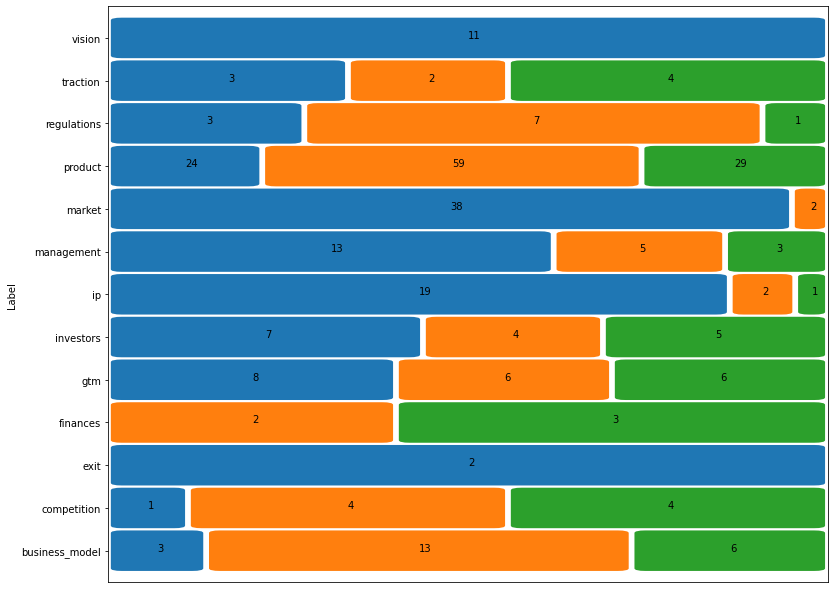

In [17]:
ax = df.plot.barh(stacked=True, width=0.98,legend=False)
ax.figure.set_size_inches(10,8)

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)

new_patches = []
for patch,data in zip(reversed(ax.patches),reversed(pd.concat([df1['count']['G'],df1['count']['N'],df1['count']['P']],axis=0).values)):
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=-0.0040,rounding_size=0.015",
                        ec="none", fc=color,
                        mutation_aspect=4
                        )
    if math.isnan(data)==False:
        plt.annotate(int(data),(bb.xmin+abs(bb.width)/2, bb.ymin+abs(bb.height)/2))
        new_patches.append(p_bbox)
    patch.remove()
for patch in new_patches:
    ax.add_patch(patch)
ax.get_xaxis().set_visible(False)
plt.savefig('foo.png')

In [18]:
fog = gca()

NameError: name 'gca' is not defined